In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf
import matplotlib as plt
import riskfolio.Reports as rp

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import black_litterman, risk_models
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier, objective_functions

In [2]:
start = "2016-01-01"
end = "2020-12-30"

# Tickers of assets
assets = ['STX', 'TXN', 'ITW', 'LRCX', 'ORCL', 'QCOM', 'AAPL', 'IBM', 'AVGO']
assets.sort()

In [3]:
data = yf.download(assets, start = start, end = end, threads = False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  9 of 9 completed


In [4]:
Y = data[assets].pct_change().dropna()

In [5]:
S = risk_models.CovarianceShrinkage(data[assets]).ledoit_wolf()

In [6]:
port = pf.Portfolio(returns = Y)
port.assets_stats(method_mu= 'hist', method_cov= 'hist') 

In [7]:
model='BL' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' 
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False 
rf = 0.05
l = 0 
points = 50

In [8]:
market_data = yf.download("^GSPC", start = start, end = end, threads = False)
market_data = market_data.loc[:,('Adj Close')]

[*********************100%***********************]  1 of 1 completed


In [9]:
delta = black_litterman.market_implied_risk_aversion(market_data)

In [10]:
mcaps = {}
for t in assets:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]

In [11]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)

In [12]:
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta, absolute_views={})

In [19]:
ret_bl = bl.bl_returns()
S_bl = bl.bl_cov()

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
ef.max_sharpe()
#ef.min_volatility()
#ef.portfolio_performance(verbose=visualize)
weights = ef.clean_weights()

weights = pd.Series(weights)
display(weights)

C:\Apps\Anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:247: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


NameError: name 'visualize' is not defined

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 21.6%
Annual volatility: 26.3%
Sharpe Ratio: 0.75


(0.21578681650278114, 0.2625399862569276, 0.745740941386276)

In [15]:
W1 = pd.DataFrame(weights, index = assets, columns = ['Black Lit'])

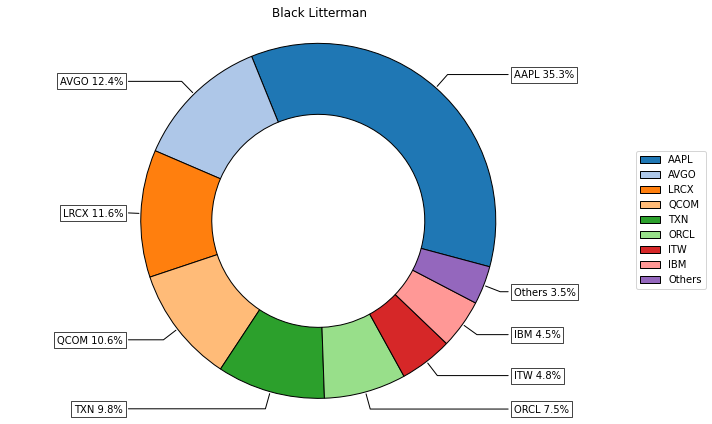

In [16]:
ax = plf.plot_pie(w=W1, title='Black Litterman', others=0.05, nrow = 25, cmap = "tab20", height=6, width=10, ax=None)

\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Apps\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were

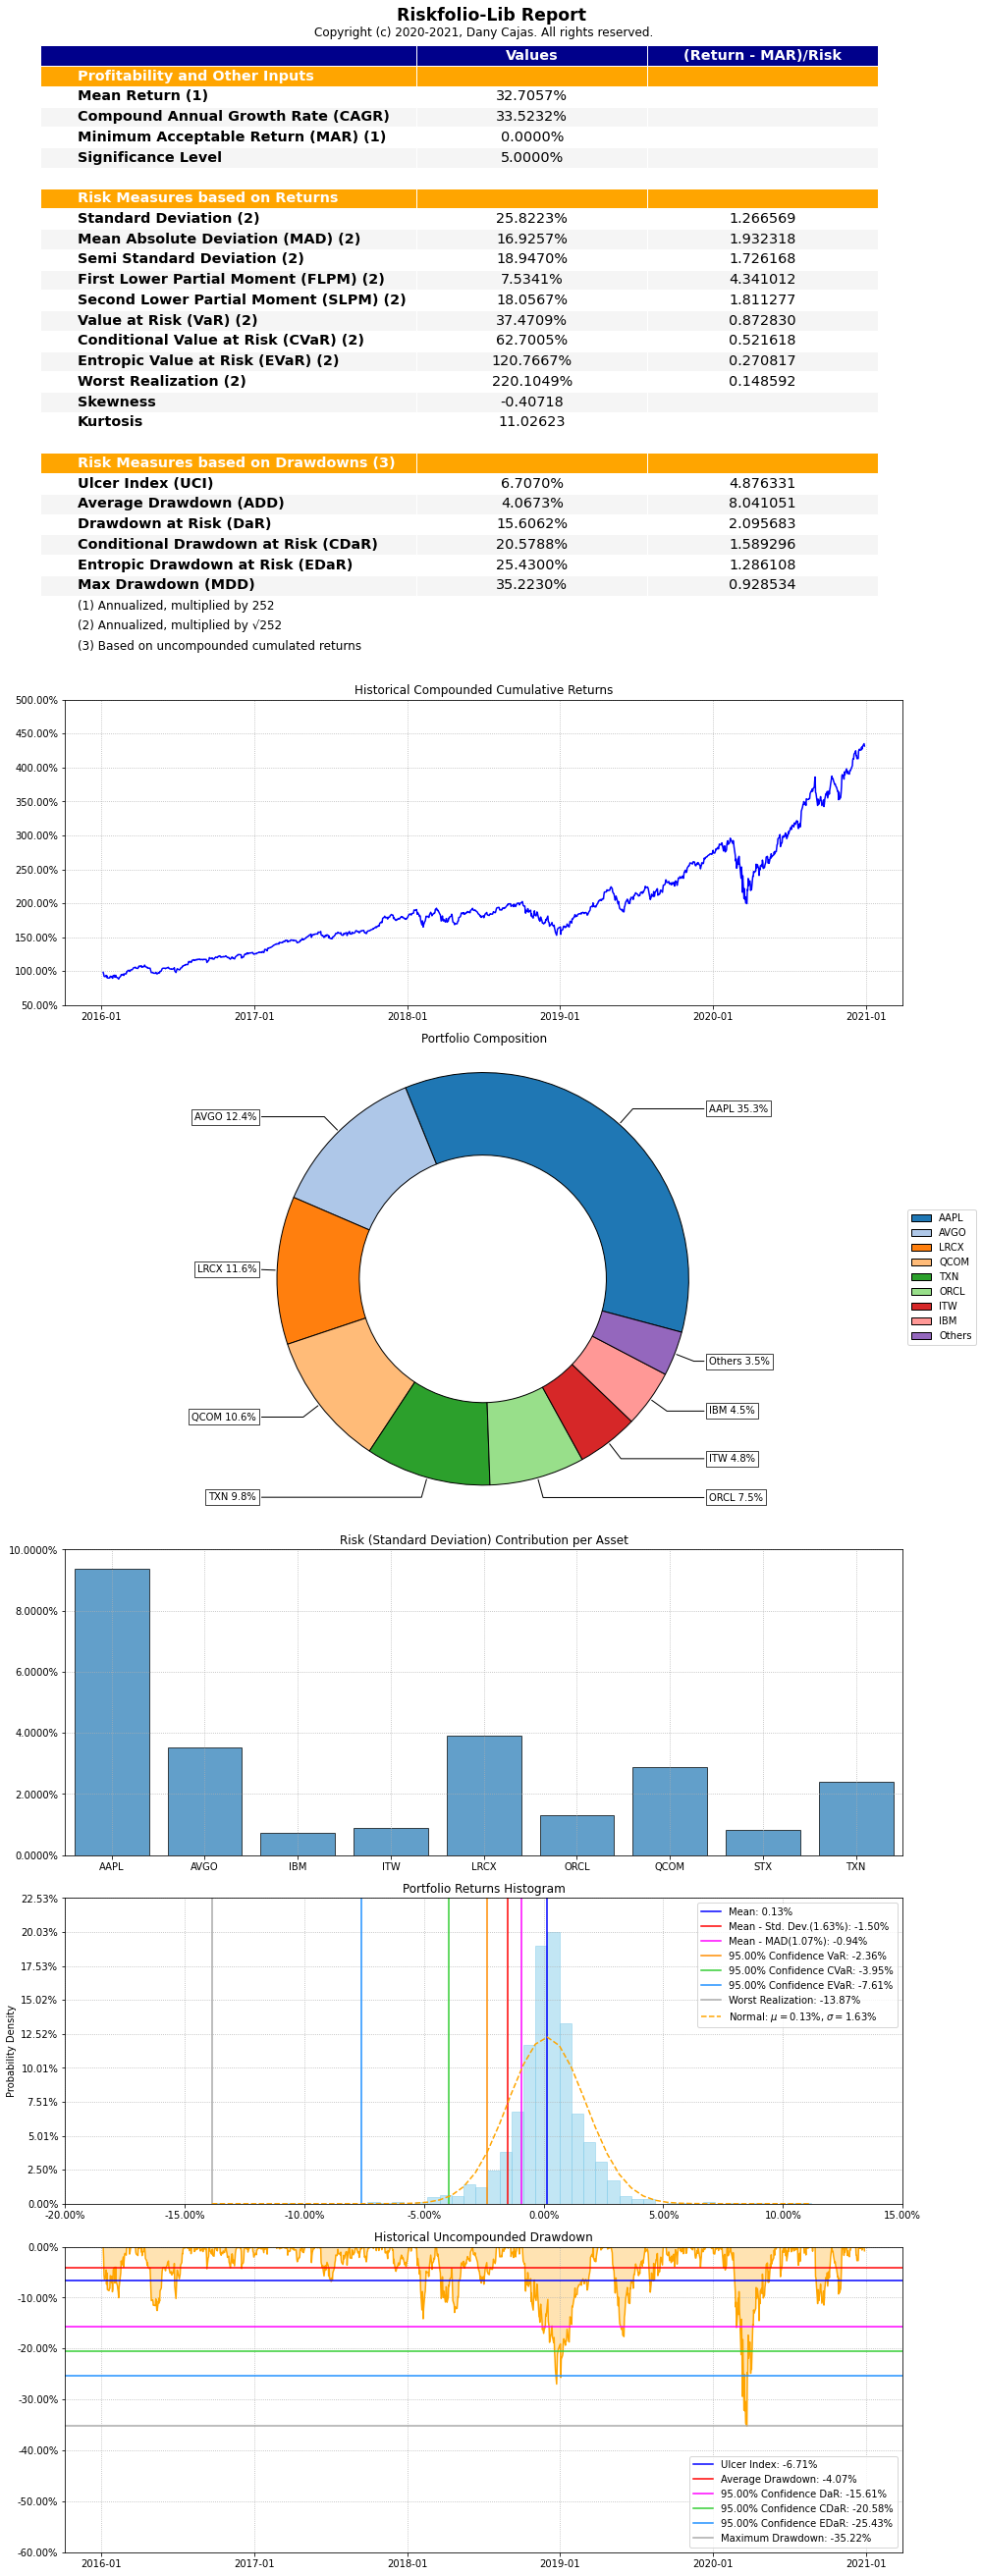

In [17]:
ax_report = rp.jupyter_report(Y, w=W1, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

In [18]:
ff_factors = pd.read_csv('FamaFrench.xlsx', index_col=0, header=0)/100


ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 3
